
Computational astrophy test site:¶

co owned by Sarah Kok, Maria Georganti and Athul Muralidhar Jan, 2018

This source code is written in Python-3 All values in AU, Solar system units


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook 
from time import time
from matplotlib import animation

<IPython.core.display.Javascript object>


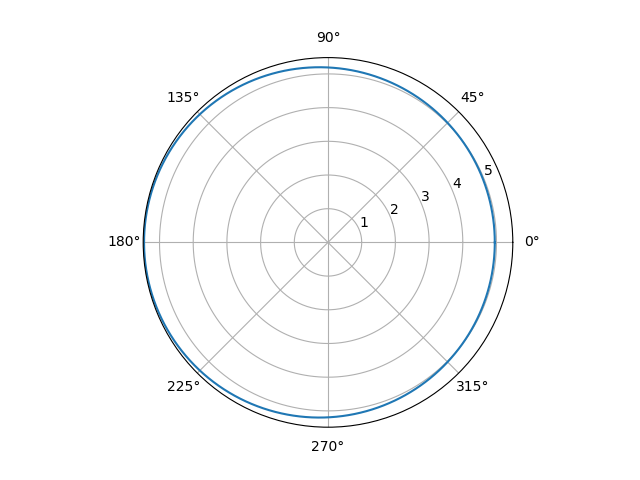

'\nreferences:\nhttps://nssdc.gsfc.nasa.gov/planetary/factsheet/jupiterfact.html\nhttps://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion\n'

In [2]:
cos = np.cos
pi = np.pi

a = 5.204 # semimajor axis - Jupiter
e = 0.0489 # orbital eccentricity-Jupiter
theta = np.linspace(0, 2*pi, 360) # degrees
r = (a*(1-e**2))/(1+e*cos(theta)) # Kepler's law for orbits
 
plt.polar(theta, r)
plt.show()

"""
references:
https://nssdc.gsfc.nasa.gov/planetary/factsheet/jupiterfact.html
https://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion
"""

<IPython.core.display.Javascript object>


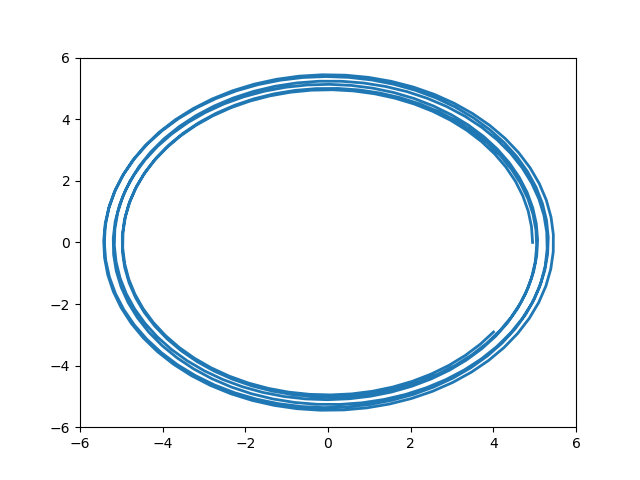

time taken: 0.06225228309631348


In [3]:
s = time()
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!

 ref : https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/
"""



cos = np.cos
sin = np.sin
pi = np.pi

a = 5.204 # semimajor axis - Jupiter
e = 0.0489 # orbital eccentricity-Jupiter
theta = np.linspace(0, 2*pi, 360) # degrees
r = (a*(1-e**2))/(1+e*cos(theta)) # Kepler's law for orbits


# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-6, 6), ylim=(-6, 6))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = r*cos(theta*0.1*i)
    y = r*sin(theta*0.1*i)
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
# anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

e = time()
print('time taken:',e-s)


Eqns to slove:
$$\dot x _{i+1} = x_{i}+hv_{i}$$$$\dot{v}_{i+1} = v_{i}-\frac{4\pi^{2}hx_{i}}{\cos(\theta)(x^{2}+y^{2})^{3/2}}$$$$\dot y _{i+1} = y_{i}+hu_{i}$$$$\dot{u}_{i+1} = u_{i}-\frac{4\pi^{2}hy_{i}}{\sin(\theta)(x^{2}+y^{2})^{3/2}}$$


In [2]:
a = 5.204
e = 0.0489 
h = 0.005
s = time()

def eul_fwd(h,theta,prev):
    r = (prev[0]**2+prev[2]**2)**3/2
    matrix_x = np.array([[1,h],[-4*np.pi**2*h/r*np.cos(theta),1]])
    matrix_y = np.array([[1,h],[-4*np.pi**2*h/r*np.sin(theta),1]])
    
    xvprev = np.array([prev[0],prev[1]])
    yuprev = np.array([prev[2],prev[3]])
    
    xv = np.dot(matrix_x,xvprev)
    yu = np.dot(matrix_y,yuprev)
#     print(xv)
#     print(np.array([xv,yu]))
    return np.array([xv,yu])



theta = np.linspace(0.1,2*np.pi)
j=1
res_xv = []
res_yu = []

for i in theta:
    if j==1:
        prev = [1,0,5.204*(1-0.0489),-((4*np.pi**2*(1+0.0489))/(5.204*(1-0.0489)))**1/2] #x,v,y,u
    else:
        prev[0] = a[0][0]
        prev[1] = a[0][1]
        prev[2] = a[1][0]
        prev[3] = a[1][1]
    
    a = eul_fwd(h,i,prev)
    res_xv.append(a[0][0])#,a[0][1]])
    res_yu.append(a[0][1])#,a[1][1]])
    j=j+1

# print(res_yu)
# print(res_xv)
# plt.plot(theta,res[:][0])
e = time()
print('time taken:',e-s)

('time taken:', 0.0051000118255615234)


# new eqn to solve:

$$a = (sum-over-i)\frac{GM_{i}}{|\textbf{x}_{ast}-\textbf{x}_{i}|^{3}}|\textbf{x}_{ast}-\textbf{x}_{i}|$$

# things that wouter said:
* try to calculate acc due to sun and jupiter
* use numpy arrays as much as possible
* shift cos sin to the numerator in the previous code
* astroids are massless
* use euler cromer -  selma

ref: week 3.2 ppt
ref: euler cromer - https://wikivisually.com/wiki/Euler-Cromer_algorithm


In [28]:
"""
p1 referrs to particle-1 and p2 referrs to particle-2
"""
s = time()
m1 = 1 # Solar mass
m2 = 0.00095 # =([mass Jupiter]1.898*10^27/[mass Sun]1.989*10^30)           0.5 # jupiter mass
G = 4*np.pi 
h = 1e-1
x1 = np.zeros(10)
y1 = np.zeros(10)
x2 = np.zeros(10) # jupiter initial x
y2 = np.zeros(10) # jupiter initial y
v_x1 = np.zeros(10)
v_y1 = np.zeros(10)
v_x2 = np.zeros(10) # jupiter initial v_X
v_y2 = np.zeros(10) # jupiter initial v_X
a = 5.204
e = 0.0489
#initial conditions:
y2[0] = a*(1-e)
v_x2[0] = -((G*m1*(1+e))/(a*(1-e)))**1/2
v_y2[0] = -((G*m1*(1+e))/(a*(1-e)))**1/2  # i dont know if this is the same as v_x2

# print(x1)

def eul_cromer(prev):
    
    # 2 body problem using the above eqn
    # calculating vdot_x1 for p1
    
    # the new prev is now [x1,y1,x2,y2,vx1,vy1,vx2,vy2]
    
    # only x for both p1 and p2
    xnew_p1 = prev[0] + prev[4]*h
    xnew_p2 = prev[2] + prev[6]*h
    vxnew_p1 = -G*h*m2*(xnew_p1-xnew_p2)/(xnew_p1-xnew_p2)**3 + prev[4]
    vxnew_p2 = -G*h*m1*(xnew_p2-xnew_p1)/(xnew_p2-xnew_p1)**3 + prev[6]
    
    # only y for p1 and p2
    ynew_p1 = prev[1] + prev[5]*h
    ynew_p2 = prev[3] + prev[7]*h
    vynew_p1 = -G*h*m2*(ynew_p1-ynew_p2)/(ynew_p1-ynew_p2)**3 + prev[5]
    vynew_p2 = -G*h*m1*(ynew_p2-ynew_p1)/(ynew_p2-ynew_p1)**3 + prev[7]
    
    return np.array([xnew_p1,ynew_p1,xnew_p2,ynew_p2,vxnew_p1,vynew_p1,vxnew_p2,vynew_p2]) 

# lists
# positions
p1x = []
p1y = []
p2x = []
p2y = []

# velocities
p1vx = []
p1vy = []
p2vx = []
p2vy = []

for i in range(10):
    if i==0:
        prev = np.array([x1[0],y1[0],x2[0],y2[0],v_x1[0],v_y1[0],v_x2[0],v_y2[0]]) # initial conditions
    else:
        prev[0] = a[0]
        prev[1] = a[1]
        prev[2] = a[2]
        prev[3] = a[3]
        prev[4] = a[4]
        prev[5] = a[5]
        prev[6] = a[6]
        prev[7] = a[7]
    
    a = eul_cromer(prev)
#     print(a)
    
    # append your results here:
    p1x.append(a[0])
    p1y.append(a[1])
    p2x.append(a[2])
    p2y.append(a[3])
    p1vx.append(a[4])
    p1vy.append(a[5])
    p2vx.append(a[6])
    p2vy.append(a[7])

# print len(p1x)
# print len(p1y)
# print len(p2x)
# print len(p2y)
# print len(p1vx)
# print len(p1vy)
# print len(p2vx)
# print len(p2vy)

e =  time()
print('time taken:',e-s)

('time taken:', 0.002410888671875)


<IPython.core.display.Javascript object>


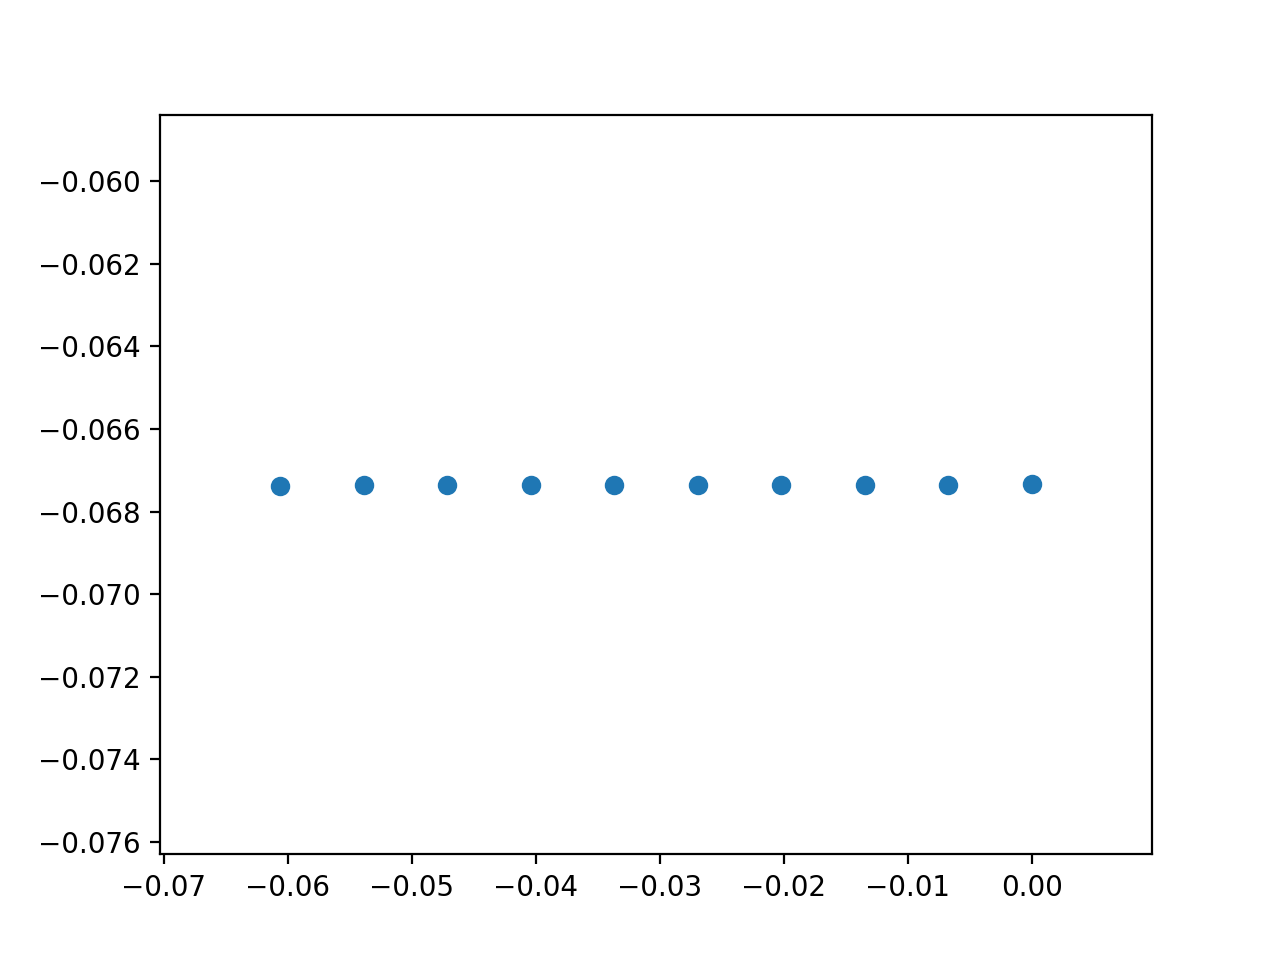

In [27]:
plt.scatter(p1x,p1vx)
plt.show()

# things to do in the above code:

* check if the above code works corretly by plotting
* change the initial parameters like mass and other things
* check if all the units are in au
* check if they actuly describe our system
